In [2]:
import pandas as pd
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.optimizers import SGD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import tree

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df=pd.read_csv('/content/gdrive/My Drive/Mini_project_Bridge/freeTrial-rawData-7june2021_1.csv')

Visualization for 21 days: 

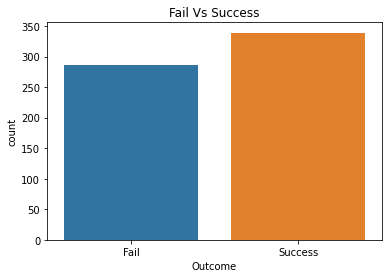

In [5]:
sns.countplot(x='Outcome', 
              data=df)
plt.xticks([0,1], ['Fail', 'Success'])
plt.title('Fail Vs Success')
plt.show()

In [29]:
scaler=StandardScaler()
X_Visualization_df=df[['users after 3D','users after 7D','users after 10D','users after 14D','users after 21D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','workouts after 21D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','sessions 21D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','activeprogram 21D','users 14 to 21','workouts 14 to 21','sessions 14 to 21','activeprogram 14 to 21']]
X_Visualization=X_Visualization_df.values
X_Visualization_scaled=scaler.fit_transform(X_Visualization)
X_Visualization_normalized=normalize(X_Visualization_scaled)

In [30]:
y_visualization=df['Outcome'].values

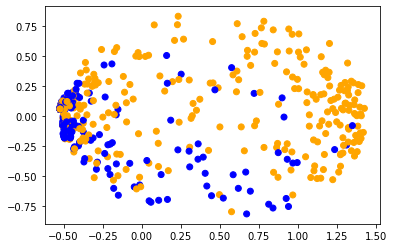

In [31]:
pca_model=PCA(n_components=2)
transformed=pca_model.fit_transform(X_Visualization_normalized)
plt.scatter(transformed[:,0],transformed[:,1],c=y_visualization,cmap=matplotlib.colors.ListedColormap(['blue','orange']))


# **Measuring predictive power over time, at days 7, 14, 21**

**Using 7 days:**

In [ ]:
X1_df=df[['users after 3D','users after 7D','workouts after 3D','workouts after 7D','sessions 3D','sessions 7D','activeprogram 3D','activeprogram 7D','users 3 to 7','workouts 3 to 7','sessions 3 to 7','activeprogram 3 to 7']]

In [ ]:
X1=X1_df.values
y=df['Outcome'].values

In [ ]:
scaler=StandardScaler()
X1_scaled=scaler.fit_transform(X1)
X1_normalized=normalize(X1_scaled)


In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X1_normalized, y):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(12,activation="relu",input_shape=(12,)))
  model.add(Dense(6,activation="relu"))
  model.add(Dense(3,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X1_normalized[train], y[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(X1_normalized[test], y[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(X1_normalized[train],y[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.5732784271240234; accuracy of 73.41772317886353%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.5107107758522034; accuracy of 74.35897588729858%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.6111242771148682; accuracy of 67.94871687889099%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.6259808540344238; accuracy of 66.66666865348816%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.5928375124931335; accuracy of 69.2307710647583%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.690296

Using 7 days results: 

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  67.29174628853798 %

Testing accuracy:  67.19003692269325 %



**Using 14 Days:**

In [ ]:
X2_df=df[['users after 3D','users after 7D','users after 10D','users after 14D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','users 10 to 14','workouts 10 to 14','sessions 10 to 14','activeprogram 10 to 14']]

In [ ]:
X2=X2_df.values

In [ ]:
scaler=StandardScaler()
X2_scaled=scaler.fit_transform(X2)
X2_normalized=normalize(X2_scaled)


In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X2_normalized, y):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(20,activation="relu",input_shape=(20,)))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(5,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X2_normalized[train], y[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(X2_normalized[test], y[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(X2_normalized[train],y[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.5157524347305298; accuracy of 74.6835470199585%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.49345099925994873; accuracy of 74.35897588729858%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.5464919805526733; accuracy of 69.2307710647583%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.5989065766334534; accuracy of 73.07692170143127%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.5907778143882751; accuracy of 70.51281929016113%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.581154

Using 14 days results: 

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  72.98250198364258 %

Testing accuracy:  69.59185376763344 %



**Using 21 Days:**

In [ ]:
X3_df=df[['users after 3D','users after 7D','users after 10D','users after 14D','users after 21D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','workouts after 21D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','sessions 21D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','activeprogram 21D','users 14 to 21','workouts 14 to 21','sessions 14 to 21','activeprogram 14 to 21']]

In [ ]:
X3=X3_df.values

In [ ]:
scaler=StandardScaler()
X3_scaled=scaler.fit_transform(X3)
X3_normalized=normalize(X3_scaled)


In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X3_normalized, y):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(24,activation="relu",input_shape=(24,)))
  model.add(Dense(12,activation="relu"))
  model.add(Dense(6,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X3_normalized[train], y[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(X3_normalized[test], y[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(X3_normalized[train],y[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.4513552784919739; accuracy of 79.7468364238739%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.47837668657302856; accuracy of 75.64102411270142%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.5233100056648254; accuracy of 67.94871687889099%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.539134681224823; accuracy of 73.07692170143127%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.6072507500648499; accuracy of 66.66666865348816%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.603570

Using 21 days results: 

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  74.83405023813248 %

Testing accuracy:  70.54527774453163 %



# **Comparing to baseline**

In [ ]:
X3_train,X3_test,y_train,y_test=train_test_split(X3_normalized,y,test_size=0.2,shuffle=True)

In [ ]:
model=Sequential()
model.add(Dense(24,activation="relu",input_shape=(24,)))
model.add(Dense(12,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X3_train, y_train,validation_data=(X3_test,y_test),
              epochs=500,
              verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 31ms/step - loss: 0.7039 - accuracy: 0.4325 - val_loss: 0.6965 - val_accuracy: 0.5040
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.4829 - val_loss: 0.6953 - val_accuracy: 0.5040
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.4758 - val_loss: 0.6943 - val_accuracy: 0.5520
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5050 - val_loss: 0.6934 - val_accuracy: 0.5840
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5297 - val_loss: 0.6925 - val_accuracy: 0.6240
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5660 - val_loss: 0.6917 - val_accuracy: 0.6240
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5791 - val_loss: 0.6910 - val_accuracy: 0.6080
Epoch 8/500


In [ ]:
y_predict=model.predict(X3_test)
y_predict=(y_predict>0.5).astype(int)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79        63
         1.0       0.86      0.60      0.70        62

    accuracy                           0.75       125
   macro avg       0.78      0.75      0.75       125
weighted avg       0.78      0.75      0.75       125



In [ ]:

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X3_train, y_train)

print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_clf.score(X3_train, y_train)))
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(X3_test, y_test)))

The accuracy of the XGBoost classifier on training data is 0.88
The accuracy of the XGBoost classifier on test data is 0.73


In [ ]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X3_train, y_train)

#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X3_train, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X3_test, y_test)))

The accuracy of the Random Forest classifier on training data is 0.91
The accuracy of the Random Forest classifier on test data is 0.73


In [ ]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X3_train, y_train)

#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X3_train, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X3_test, y_test)))

The accuracy of the Decision Tree classifier on training data is 0.91
The accuracy of the Decision Tree classifier on test data is 0.68


# **Redefining Utility Function?**

In [5]:
df2=pd.read_csv('/content/gdrive/My Drive/Mini_project_Bridge/freeTrial-rawData-10june2021_1.csv')

Visualizing for 21 days: 

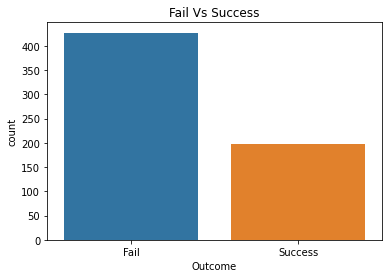

In [36]:
sns.countplot(x='Outcome', 
              data=df2)
plt.xticks([0,1], ['Fail', 'Success'])
plt.title('Fail Vs Success')
plt.show()

In [38]:
scaler=StandardScaler()
XR_Visualization_df=df2[['users after 3D','users after 7D','users after 10D','users after 14D','users after 21D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','workouts after 21D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','sessions 21D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','activeprogram 21D','users 14 to 21','workouts 14 to 21','sessions 14 to 21','activeprogram 14 to 21']]
XR_Visualization=XR_Visualization_df.values
XR_Visualization_scaled=scaler.fit_transform(XR_Visualization)
XR_Visualization_normalized=normalize(XR_Visualization_scaled)

In [39]:
yR_visualization=df2['Outcome'].values

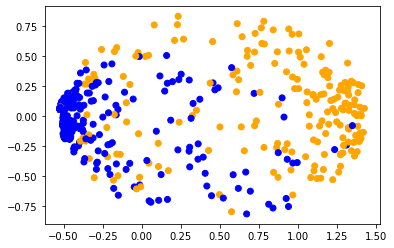

In [40]:
pca_model=PCA(n_components=2)
transformed=pca_model.fit_transform(XR_Visualization_normalized)
plt.scatter(transformed[:,0],transformed[:,1],c=yR_visualization,cmap=matplotlib.colors.ListedColormap(['blue','orange']))

In [ ]:
XR_df=df[['users after 3D','users after 7D','users after 10D','users after 14D','users after 21D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','workouts after 21D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','sessions 21D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','activeprogram 21D','users 14 to 21','workouts 14 to 21','sessions 14 to 21','activeprogram 14 to 21']]

In [ ]:
XR=XR_df.values

In [ ]:
scaler=StandardScaler()
XR_scaled=scaler.fit_transform(XR)
XR_normalized=normalize(XR_scaled)

In [ ]:
yR=df2['Outcome'].values

Visualize how data points are split: 

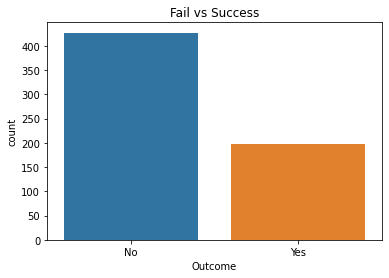

In [ ]:
sns.countplot(x='Outcome', 
              data=df2)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Fail vs Success')
plt.show()

In [ ]:
pca_modelR=PCA(n_components=2)
pca_modelR.fit(XR_normalized)
transformedR=pca_modelR.transform(XR_normalized)

Visualizing how the split of the data between the 2 classes

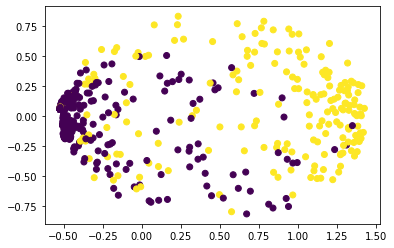

In [ ]:
plt.scatter(transformedR[:,0],transformedR[:,1],c=yR)
plt.show()

Trying the model on the new data

In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XR_normalized, yR):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(24,activation="relu",input_shape=(24,)))
  model.add(Dense(12,activation="relu"))
  model.add(Dense(6,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(XR_normalized[train], yR[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(XR_normalized[test], yR[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(XR_normalized[train],yR[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3929859697818756; accuracy of 88.60759735107422%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.26673799753189087; accuracy of 88.46153616905212%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.1513950079679489; accuracy of 93.58974099159241%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.224278524518013; accuracy of 92.30769276618958%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.3959793746471405; accuracy of 85.89743375778198%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.22701

Redefining results: 

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  93.80574896931648 %

Testing accuracy:  90.88364019989967 %



Implementing the redefined version: 

In [ ]:
XR_train,XR_test,yR_train,yR_test=train_test_split(XR_normalized,yR,test_size=0.2,shuffle=True)

In [ ]:
model=Sequential()
model.add(Dense(24,activation="relu",input_shape=(24,)))
model.add(Dense(12,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(XR_train, yR_train,validation_data=(XR_test,yR_test),
              epochs=500,
              verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 29ms/step - loss: 0.6694 - accuracy: 0.7385 - val_loss: 0.6513 - val_accuracy: 0.6960
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6601 - val_loss: 0.6366 - val_accuracy: 0.6800
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.6720 - val_loss: 0.6240 - val_accuracy: 0.6800
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6560 - val_loss: 0.6122 - val_accuracy: 0.6800
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6667 - val_loss: 0.6012 - val_accuracy: 0.6800
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5965 - accuracy: 0.6883 - val_loss: 0.5906 - val_accuracy: 0.6800
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.6650 - val_loss: 0.5804 - val_accuracy: 0.6800
Epoch 8/500


In [ ]:
yR_predict=model.predict(XR_test)
yR_predict=(yR_predict>0.5).astype(int)

In [ ]:
print(classification_report(yR_test,yR_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91        85
         1.0       0.80      0.82      0.81        40

    accuracy                           0.88       125
   macro avg       0.86      0.87      0.86       125
weighted avg       0.88      0.88      0.88       125



# **REDEFINED UTILITY FUNCTION: Measuring predictive power over time, at days 7, 14, 21**

**Using 7 days**

In [ ]:
XR1_df=df2[['users after 3D','users after 7D','workouts after 3D','workouts after 7D','sessions 3D','sessions 7D','activeprogram 3D','activeprogram 7D','users 3 to 7','workouts 3 to 7','sessions 3 to 7','activeprogram 3 to 7']]

In [ ]:
XR1=XR1_df.values

In [ ]:
scaler=StandardScaler()
XR1_scaled=scaler.fit_transform(XR1)
XR1_normalized=normalize(XR1_scaled)

In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XR1_normalized, yR):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(12,activation="relu",input_shape=(12,)))
  model.add(Dense(6,activation="relu"))
  model.add(Dense(3,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(XR1_normalized[train], yR[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(XR1_normalized[test], yR[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(XR1_normalized[train],yR[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.5200524926185608; accuracy of 78.48101258277893%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.3955920338630676; accuracy of 82.05128312110901%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3226267099380493; accuracy of 88.46153616905212%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.3571975827217102; accuracy of 85.89743375778198%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.5425649881362915; accuracy of 75.64102411270142%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.42960

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  85.0972831249237 %

Testing accuracy:  82.8870490193367 %



**Using 14 days**

In [ ]:
XR2_df=df2[['users after 3D','users after 7D','users after 10D','users after 14D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','users 10 to 14','workouts 10 to 14','sessions 10 to 14','activeprogram 10 to 14']]

In [ ]:
XR2=XR2_df.values

In [ ]:
scaler=StandardScaler()
XR2_scaled=scaler.fit_transform(XR2)
XR2_normalized=normalize(XR2_scaled)

In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XR2_normalized, yR):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(20,activation="relu",input_shape=(20,)))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(5,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(XR2_normalized[train], yR[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(XR2_normalized[test], yR[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(XR2_normalized[train],yR[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3811931014060974; accuracy of 84.8101258277893%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.34125176072120667; accuracy of 84.61538553237915%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.2876336872577667; accuracy of 87.17948794364929%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.32207027077674866; accuracy of 84.61538553237915%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.43715471029281616; accuracy of 83.33333134651184%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.318

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  90.56002199649811 %

Testing accuracy:  86.40254735946655 %



**Using 21 days**

In [ ]:
XR3_df=df2[['users after 3D','users after 7D','users after 10D','users after 14D','users after 21D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','workouts after 21D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','sessions 21D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','activeprogram 21D','users 14 to 21','workouts 14 to 21','sessions 14 to 21','activeprogram 14 to 21']]

In [ ]:
XR3=XR3_df.values

In [ ]:
scaler=StandardScaler()
XR3_scaled=scaler.fit_transform(XR3)
XR3_normalized=normalize(XR3_scaled)

In [ ]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XR3_normalized, yR):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(24,activation="relu",input_shape=(24,)))
  model.add(Dense(12,activation="relu"))
  model.add(Dense(6,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(XR3_normalized[train], yR[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(XR3_normalized[test], yR[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(XR3_normalized[train],yR[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.36712372303009033; accuracy of 87.34177350997925%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.2649514377117157; accuracy of 88.46153616905212%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.15714070200920105; accuracy of 92.30769276618958%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.2527804374694824; accuracy of 91.02563858032227%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.37871673703193665; accuracy of 85.89743375778198%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.21

In [ ]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  93.57706233859062 %

Testing accuracy:  90.56515619158745 %



# **Extra: comparison with other models14D**

In [6]:
XC_df=df2[['users after 3D','users after 7D','users after 10D','users after 14D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','users 10 to 14','workouts 10 to 14','sessions 10 to 14','activeprogram 10 to 14']]

In [7]:
scaler=StandardScaler()
XC=XC_df.values
XC_scaled=scaler.fit_transform(XC)
XC_normalized=normalize(XC_scaled)

In [8]:
yC=df2['Outcome'].values

In [9]:
acc_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XC_normalized, yC):

  # Define the model architecture


  xgb_clf = xgb.XGBClassifier()
  


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  xgb_clf = xgb_clf.fit(XC_normalized[train], yC[train])

  
  # Generate generalization metrics
  score = xgb_clf.score(XC_normalized[test], yC[test])
  train_acc_per_fold.append(xgb_clf.score(XC_normalized[train],yC[train])*100)
  print(f'Score for fold {fold_no}: accuracy of {score*100}%')
  acc_per_fold.append(score * 100)
  

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: accuracy of 81.0126582278481%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: accuracy of 88.46153846153845%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: accuracy of 87.17948717948718%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: accuracy of 89.74358974358975%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: accuracy of 80.76923076923077%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: accuracy of 88.46153846153845%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: accuracy o

In [10]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  97.43995720915282 %

Testing accuracy:  86.56888997078872 %



In [11]:
acc_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XC_normalized, yC):

  # Define the model architecture


  random_forest = RandomForestClassifier()
  


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  random_forest = random_forest.fit(XC_normalized[train], yC[train])

  
  # Generate generalization metrics
  score = random_forest.score(XC_normalized[test], yC[test])
  train_acc_per_fold.append(random_forest.score(XC_normalized[train],yC[train])*100)
  print(f'Score for fold {fold_no}: accuracy of {score*100}%')
  acc_per_fold.append(score * 100)
  

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: accuracy of 84.81012658227847%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: accuracy of 87.17948717948718%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: accuracy of 83.33333333333334%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: accuracy of 89.74358974358975%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: accuracy of 84.61538461538461%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: accuracy of 88.46153846153845%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: accuracy 

In [13]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  99.08571395088762 %

Testing accuracy:  86.8833171048361 %



In [14]:
acc_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XC_normalized, yC):

  # Define the model architecture


  decision_tree = tree.DecisionTreeClassifier(criterion='gini')
  


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  decision_tree = decision_tree.fit(XC_normalized[train], yC[train])

  
  # Generate generalization metrics
  score = decision_tree.score(XC_normalized[test], yC[test])
  train_acc_per_fold.append(decision_tree.score(XC_normalized[train],yC[train])*100)
  print(f'Score for fold {fold_no}: accuracy of {score*100}%')
  acc_per_fold.append(score * 100)
  

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: accuracy of 79.74683544303798%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: accuracy of 83.33333333333334%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: accuracy of 79.48717948717949%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: accuracy of 85.8974358974359%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: accuracy of 82.05128205128204%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: accuracy of 80.76923076923077%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: accuracy o

In [16]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  99.08571395088762 %

Testing accuracy:  82.24399545602077 %



In [17]:
sgd=SGD(learning_rate=0.01)
acc_per_fold=[]
loss_per_fold=[]
train_acc_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=8)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(XC_normalized, yC):

  # Define the model architecture


  model=Sequential()
  model.add(Dense(20,activation="relu",input_shape=(20,)))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(5,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(XC_normalized[train], yC[train],
              epochs=500,
              verbose=0)
  
  # Generate generalization metrics
  scores = model.evaluate(XC_normalized[test], yC[test], verbose=0)
  train_acc_per_fold.append(model.evaluate(XC_normalized[train],yC[train],verbose=0)[1]*100)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3648037910461426; accuracy of 84.8101258277893%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.3439517021179199; accuracy of 84.61538553237915%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.2716818153858185; accuracy of 87.17948794364929%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.28093358874320984; accuracy of 91.02563858032227%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.39266344904899597; accuracy of 85.89743375778198%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.3279

In [18]:
print("Training accuracy: ", np.mean(np.array(train_acc_per_fold)), "%\n")
print("Testing accuracy: ",np.mean(np.array(acc_per_fold)), "%\n")

Training accuracy:  91.10834375023842 %

Testing accuracy:  87.36408576369286 %



## **Now using all the data as training and then testing on a new set of data: (REDEFINED MODEL USING 14D)**

In [19]:
XR_OLD_df=df2[['users after 3D','users after 7D','users after 10D','users after 14D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','users 10 to 14','workouts 10 to 14','sessions 10 to 14','activeprogram 10 to 14']]

In [20]:
XR_OLD=XR_OLD_df.values

In [21]:
scaler=StandardScaler()
XR_OLD_scaled=scaler.fit_transform(XR_OLD)
XR_OLD_normalized=normalize(XR_OLD_scaled)

In [22]:
yR_OLD=df2['Outcome'].values

In [23]:
df_test=pd.read_csv('/content/gdrive/My Drive/Mini_project_Bridge/testData-freeTrailPrediction-JuneJuly2020_1.csv')

In [25]:
XR_NEW_df=df_test[['users after 3D','users after 7D','users after 10D','users after 14D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','users 10 to 14','workouts 10 to 14','sessions 10  to 14','activeprogram 10 to 14']]

In [26]:
XR_NEW=XR_NEW_df.values

In [27]:
XR_NEW_scaled=scaler.transform(XR_NEW)
XR_NEW_normalized=normalize(XR_NEW_scaled)

In [28]:
yR_NEW=df_test['Outcome'].values

In [29]:
model=Sequential()
model.add(Dense(20,activation="relu",input_shape=(20,)))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(XR_OLD_normalized, yR_OLD,
              epochs=500,
              verbose=1)

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.6667
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.7419
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.7030
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.7486
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6930
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6968
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6950
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6853
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7077
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6767
Epoch 11/

**NN (20-20-12-6-1):**

In [31]:
model.evaluate(XR_NEW_normalized,yR_NEW)

7/7 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.9091


[0.23947261273860931, 0.9090909361839294]

In [32]:

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(XR_OLD_normalized, yR_OLD)



**XGBoost:**

In [33]:
print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_clf.score(XR_OLD_normalized, yR_OLD)))
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(XR_NEW_normalized, yR_NEW)))

The accuracy of the XGBoost classifier on training data is 0.97
The accuracy of the XGBoost classifier on test data is 0.87


In [34]:
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(XR_OLD_normalized, yR_OLD)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**RandomForest:**

In [35]:
#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(XR_OLD_normalized, yR_OLD)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(XR_NEW_normalized, yR_NEW)))

The accuracy of the Random Forest classifier on training data is 0.99
The accuracy of the Random Forest classifier on test data is 0.88


In [36]:
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(XR_OLD_normalized, yR_OLD)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Decision Tree**

In [37]:
#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(XR_OLD_normalized, yR_OLD)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(XR_NEW_normalized, yR_NEW)))

The accuracy of the Decision Tree classifier on training data is 0.99
The accuracy of the Decision Tree classifier on test data is 0.83


## **Feature engineering analysis: Which features are the most relevant**

In [ ]:
#Will use XR_OLD_normalized defined previously 
XR_OLD_normalized_df=pd.DataFrame(XR_OLD_normalized,columns=XR_OLD_df.columns)
yR_OLD_df=df2['Outcome']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(XR_OLD_normalized_df,yR_OLD_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(XR_OLD_normalized_df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score'))  #print 10 best features

                     Specs       Score
4          users after 21D  791.886509
14            sessions 21D  670.068412
22       sessions 14 to 21  618.808793
3          users after 14D  592.250798
19       activeprogram 21D  525.773999
13            sessions 14D  516.936735
9       workouts after 21D  478.059770
2          users after 10D  453.677713
12            sessions 10D  385.129982
18       activeprogram 14D  370.171968
8       workouts after 14D  329.666816
1           users after 7D  315.184549
21       workouts 14 to 21  282.211075
11             sessions 7D  273.280645
17       activeprogram 10D  252.472430
7       workouts after 10D  249.617977
23  activeprogram 14 to 21  234.884086
20          users 14 to 21  210.171237
16        activeprogram 7D  178.569993
6        workouts after 7D  166.691165
0           users after 3D  161.877256
10             sessions 3D  143.361825
5        workouts after 3D   65.807075
15        activeprogram 3D   23.251723


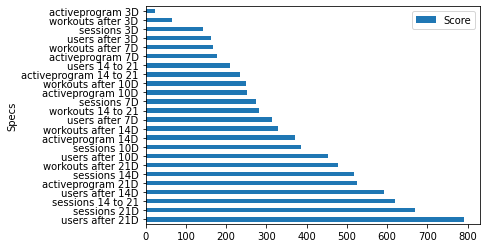

In [ ]:
featureScores.nlargest(24,'Score').plot(x='Specs',y='Score',kind='barh')

# **Action at Day 14**

What if we take only 14 days, effect on predicting faliures correctly: 

In [ ]:
X_temp_df=df2[['users after 3D','users after 7D','users after 10D','users after 14D','workouts after 3D','workouts after 7D','workouts after 10D','workouts after 14D','sessions 3D','sessions 7D','sessions 10D','sessions 14D','activeprogram 3D','activeprogram 7D','activeprogram 10D','activeprogram 14D','users 10 to 14','workouts 10 to 14','sessions 10 to 14','activeprogram 10 to 14']]
y_temp=df2['Outcome'].values
X_temp=X_temp_df.values
scaler=StandardScaler()
X_temp_scaled=scaler.fit_transform(X_temp)
X_temp_normalized=normalize(X_temp_scaled)

In [ ]:
X_temp_train,X_temp_test,y_temp_train,y_temp_test=train_test_split(X_temp_normalized,y_temp,test_size=0.2)

In [ ]:
sgd=SGD(learning_rate=0.01)
model=Sequential()
model.add(Dense(20,activation="relu",input_shape=(20,)))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_temp_train,y_temp_train,epochs=500,verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 1ms/step - loss: 0.6967 - accuracy: 0.3847
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.7617
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.7532
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.7424
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.7235
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6763
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7089
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6816
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6941
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7117
Epoch 11/

In [ ]:
y_temp_predict=model.predict(X_temp_test)
y_temp_predict=(y_temp_predict>0.5).astype(int)

In [ ]:
print(classification_report(y_temp_test,y_temp_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        75
         1.0       0.93      0.74      0.82        50

    accuracy                           0.87       125
   macro avg       0.89      0.85      0.86       125
weighted avg       0.88      0.87      0.87       125



Feature analysis: 

In [ ]:
#Will use XR_OLD_normalized defined previously 
X_temp_normalized_df=pd.DataFrame(X_temp_normalized,columns=X_temp_df.columns)
y_temp_df=df2['Outcome']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_temp_normalized_df,y_temp_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_temp_normalized_df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                     Specs       Score
3          users after 14D  562.224959
11            sessions 14D  527.173889
18       sessions 10 to 14  472.579125
2          users after 10D  465.246429
10            sessions 10D  411.862661
15       activeprogram 14D  337.429645
7       workouts after 14D  337.401649
1           users after 7D  324.878537
9              sessions 7D  287.248203
6       workouts after 10D  259.033355
14       activeprogram 10D  248.628097
17       workouts 10 to 14  209.349467
5        workouts after 7D  175.273931
13        activeprogram 7D  172.609491
0           users after 3D  165.808209
19  activeprogram 10 to 14  161.735995
8              sessions 3D  152.632251
16          users 10 to 14  127.073066
4        workouts after 3D   70.430004
12        activeprogram 3D   25.099050


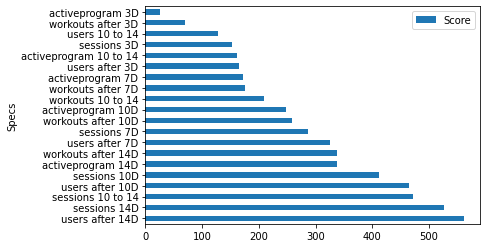

In [ ]:
featureScores.nlargest(20,'Score').plot(x='Specs',y='Score',kind='barh')

Analyzing strategy:

In [ ]:
X_df=df2[df2['Outcome']==0]

In [ ]:
X_df

,id,name,createdAt,archivedAt,Active Days,Outcome,users after 3D,users after 7D,users after 10D,users after 14D,users after 21D,users after 31D,users 3 to 7,users 7 to 10,users 10 to 14,users 14 to 21,workouts after 3D,workouts after 7D,workouts after 10D,workouts after 14D,workouts after 21D,workouts 3 to 7,workouts 7 to 10,workouts 10 to 14,workouts 14 to 21,sessions 3D,sessions 7D,sessions 10D,sessions 14D,sessions 21D,sessions 3 to 7,sessions 7 to 10,sessions 10 to 14,sessions 14 to 21,activeprogram 3D,activeprogram 7D,activeprogram 10D,activeprogram 14D,activeprogram 21D,activeprogram 3 to 7,activeprogram 7 to 10,activeprogram 10 to 14,activeprogram 14 to 21
0,14937,Luka KnielingÂ´s Company,8/1/2020 7:18,8/31/2020 7:18,30.00,0.0,2,2,3,3,3,3,0,1,0,0,1,1,3,3,4,0,2,0,1,2,2,7,8,11,0,5,1,3,1,2,5,5,5,1,3,0,0
1,14939,GonÃ§alo Pereira - Health and Performance,8/1/2020 21:47,8/31/2020 21:47,30.00,0.0,3,3,3,3,3,3,0,0,0,0,3,3,3,3,3,0,0,0,0,5,8,8,8,8,3,0,0,0,0,3,3,3,3,3,0,0,0
3,14944,CF Ball Method,8/2/2020 19:57,9/1/2020 19:57,30.00,0.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,6,7,0,2,1,1,0,1,1,1,2,1,0,0,1
4,14947,JX Strength,8/3/2020 2:46,9/2/2020 2:46,30.00,0.0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,0,0,0
5,14948,Performance Therapy,8/3/2020 3:54,10/2/2020 3:54,60.00,0.0,2,2,2,2,2,2,0,0,0,0,8,8,8,8,10,0,0,0,2,4,8,10,13,19,4,2,3,6,0,2,2,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,16045,Ricardo Gomes's Organization,3/30/2021 13:59,4/29/2021 13:59,30.00,0.0,2,2,2,2,2,2,0,0,0,0,1,1,1,1,1,0,0,0,0,3,3,3,3,4,0,0,0,1,0,1,1,1,1,1,0,0,0
621,16046,Dwight Duval's Organization,3/30/2021 14:08,4/29/2021 14:08,30.00,0.0,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,5,8,8,8,8,3,0,0,0,0,1,1,1,1,1,0,0,0
622,16050,Hunter M Stevens's Organization,3/30/2021 22:03,NaN,72.09,0.0,2,2,2,2,2,2,0,0,0,0,1,1,1,1,1,0,0,0,0,4,6,7,7,7,2,1,0,0,1,2,2,2,2,1,0,0,0
623,16057,Linn Ehrenstrom,3/31/2021 16:07,5/9/2021 17:09,39.04,0.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0


In [ ]:
users14D=X_df['users after 14D'].values
sessions14D=X_df['sessions 14D'].values
sessions10to14=X_df['sessions 10 to 14'].values
users10D=X_df['users after 10D'].values

In [ ]:
X_df[X_df['users after 14D']<=3].shape

(405, 43)

In [ ]:
#printing 10 percentile (value where 90% of people stand above)
users14D_90percentile=np.percentile(users14D,90)
sessions14D_90percentile=np.percentile(sessions14D,90)
sessions10to14_90percentile=np.percentile(sessions10to14,90)
users10D_90percentile=np.percentile(users10D,90)


In [ ]:
np.count_nonzero(users14D<3)

378

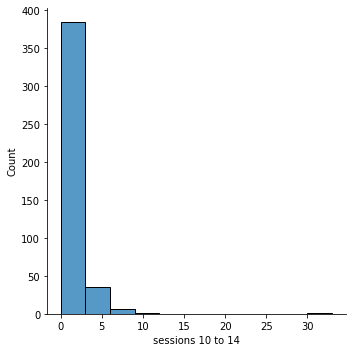

In [ ]:
sns.displot(X_df, x="sessions 10 to 14", binwidth=3)

In [ ]:
np.percentile(sessions10to14,15)

1.0

In [ ]:
print(f"90th percentile for users 14D: {users14D_90percentile}\n 90th percentile for sessions 14D: {sessions14D_90percentile} \n 90th percentile for sessions 10 to 14: {sessions10to14_90percentile}")

90th percentile for users 14D: 3.0
 90th percentile for sessions 14D: 10.0 
 90th percentile for sessions 10 to 14: 2.400000000000034


In [ ]:
 x1=(df2['users after 14D']>users14D_90percentile)
 x2=(df2['sessions 14D']>sessions14D_90percentile)
 x3=(df2['sessions 10 to 14']>sessions10to14_90percentile)
 #x4= (df2['users after 10D']<=users10D_90percentile)

In [ ]:
# values
values=[]
values.append(X_df[x1&x2].shape[0]/427)
values.append(X_df[x1&x3].shape[0]/427)
values.append(X_df[x3&x2].shape[0]/427)



In [ ]:
values2=[]
values2.append(X_df[x1].shape[0]/427)
values2.append(X_df[x2].shape[0]/427)
values2.append(X_df[x3].shape[0]/427)
values2.append(X_df[x4].shape[0]/427)


In [ ]:
values2

[0.9484777517564403,
 0.9039812646370023,
 0.8992974238875878,
 0.9484777517564403]

In [ ]:
np.mean(values2)

0.9250585480093677

In [ ]:
#x1 only
result_df=df2[ x1 & ~(x2 | x3)]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (23, 43)
fail:  (12, 43)
Success:  (11, 43)


In [ ]:
#x2 only
result_df=df2[ x2 & ~(x1 | x3)]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (8, 43)
fail:  (3, 43)
Success:  (5, 43)


In [ ]:
#x3 only
result_df=df2[ x3 & ~(x1 | x2)]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (16, 43)
fail:  (8, 43)
Success:  (8, 43)


In [ ]:
#x1 and x2 only
result_df=df2[ x1 & x2 & ~x3]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (8, 43)
fail:  (3, 43)
Success:  (5, 43)


In [ ]:
#x1 and x3 only
result_df=df2[ x1 & x3 & ~x2]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (2, 43)
fail:  (0, 43)
Success:  (2, 43)


In [ ]:
#x2 and x3 only
result_df=df2[ x2 & x3 & ~x1]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (57, 43)
fail:  (28, 43)
Success:  (29, 43)


In [ ]:
#x1 and x3 and x3 
result_df=df2[ x1 & x3 &x2]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (115, 43)
fail:  (7, 43)
Success:  (108, 43)


In [ ]:
#None
result_df=df2[ ~(x1 | x3 | x2)]
print("shape: ",result_df.shape)
print("fail: ",result_df[result_df['Outcome']==0].shape)
print("Success: ",result_df[result_df['Outcome']==1].shape)

shape:  (396, 43)
fail:  (366, 43)
Success:  (30, 43)
